In [1]:
#If th openai api key is not set already, please set it here.
import os
if 'OPENAI_API_KEY' not in os.environ:  
     os.environ['OPENAI_API_KEY'] = '***'

In [2]:
from amadeusgpt import AMADEUS
from amadeusgpt.config import Config
from amadeusgpt.utils import parse_result
import amadeusgpt
from amadeusgpt import create_project
import matplotlib.pyplot as plt
import cv2

### Note that unlike other notebooks, we don't have keypoint_file_path here (as it's not provided)
### By default, we use gpt-4o to determine which SuperAnimal models to run and it will run SuperAnimal in the first time the keypoints related queries are asked
### Make sure you use a short video clips if you are not using GPUs in Linux (Mac silicon support to be added)

In [3]:
scene_frame_number = 5000

# where you store you video and (optionally) keypoint files
data_folder = "/media1/data/marc/datasets/BlackWhiteAmadeus/data"
result_folder = "/media1/data/marc/datasets/BlackWhiteAmadeus/result"
video_suffix = ".mp4"

config = create_project(data_folder, result_folder, video_suffix = video_suffix)

config["scene_frame_number"] = scene_frame_number
config['llm_info']['gpt_model'] = 'gpt-4o'

amadeus = AMADEUS(config, use_vlm = True)
video_file_paths = amadeus.get_video_file_paths()
print (video_file_paths)

Project created at /media1/data/marc/datasets/BlackWhiteAmadeus/result. Results will be saved to /media1/data/marc/datasets/BlackWhiteAmadeus/result
The project will load video files (*.mp4) and optionally keypoint files from /media1/data/marc/datasets/BlackWhiteAmadeus/data
A copy of the project config file is saved at /media1/data/marc/datasets/BlackWhiteAmadeus/result/config.yaml
{'data_info': {'data_folder': '/media1/data/marc/datasets/BlackWhiteAmadeus/data',
               'result_folder': '/media1/data/marc/datasets/BlackWhiteAmadeus/result',
               'video_suffix': '.mp4'},
 'keypoint_info': {'include_confidence': False, 'use_3d': False},
 'llm_info': {'keep_last_n_messages': 2,
              'max_tokens': 4096,
              'temperature': 0.0},
 'object_info': {'load_objects_from_disk': False, 'use_grid_objects': False},
 'video_info': {'scene_frame_number': 1},
 'video_suffix': '.mp4'}


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0059 $
current input tokens 931
current accumulated tokens 1012
description of the image frame provided
The image appears to be a grayscale or low-contrast image with a square or rectangular shape in the center. There are no visible animals or distinct background objects.

```json
{
    "description": "A grayscale or low-contrast image with a square or rectangular shape in the center.",
    "individuals": 0,
    "species": "others",
    "background_objects": []
}
```
['/media1/data/marc/datasets/BlackWhiteAmadeus/data/video.mp4']


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0055 $
current input tokens 3394
current accumulated tokens 33072


To plot the trajectory of the animal using the animal center and color it by animal ID, we will follow these steps:

1. Retrieve the keypoints for the animals, specifically the 'Center' keypoint.
2. Extract the x and y coordinates of the 'Center' keypoint for each animal.
3. Create a scatter plot where the color of each point represents the animal ID.
4. Invert the y-axis to match the image coordinate system.
5. Set the x and y limits to cover the entire image dimensions (908, 930).

Now, I will write the code to achieve this.

```python
def plot_animal_trajectory_by_id(identifier: Identifier):
    '''
    Plots the trajectory of the animals using the 'Center' keypoint and colors it by animal ID.

    Parameters:
    ----------
    identifier: Identifier. Contains information about the video, keypoint and config.

    Returns:
    -------
    tuple: (figure, axs) of the plot.
    '''
    # create_analysis returns an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(identifier)
    
    # Get keypoints data
    keypoints = analysis.get_keypoints()  # shape: (n_frames, n_individuals, n_kpts, n_dims)
    
    # Get the index of the 'Center' keypoint
    center_index = analysis.get_keypoint_names().index('Center')
    
    # Get the number of individuals
    n_individuals = analysis.get_n_individuals()
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Loop through each animal and plot their trajectory
    for animal_id in range(n_individuals):
        # Extract the x and y coordinates of the 'Center' keypoint for the current animal
        center_keypoints = keypoints[:, animal_id, center_index, :]  # shape: (n_frames, 2)
        x = center_keypoints[:, 0]  # x coordinates
        y = center_keypoints[:, 1]  # y coordinates
        
        # Plot the trajectory for the current animal with a unique color
        ax.scatter(x, y, label=f'Animal {animal_id}', marker='o')
    
    # Invert y-axis to match the image coordinate system
    ax.invert_yaxis()
    
    # Set limits to cover the whole image
    ax.set_xlim(0, 930)  # width of the image
    ax.set_ylim(908, 0)  # height of the image (inverted)
    
    # Add legend
    ax.legend()
    
    return fig, ax
```

(<Figure size 800x800 with 1 Axes>, <Axes: >)

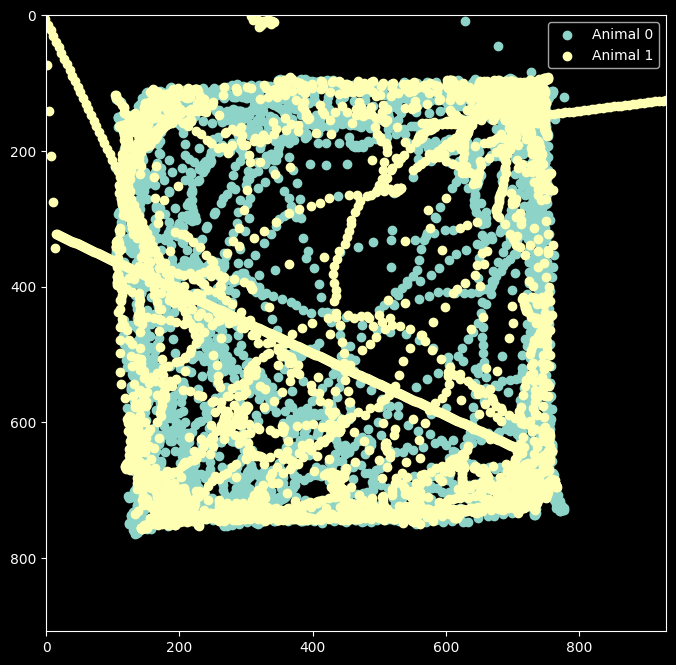

In [10]:
query = "Plot the trajectory of the animals using the animals center and color it by animal id"
qa_message = amadeus.step(query)
parse_result(amadeus, qa_message)

In [18]:
query = "how many pixels is the video height and width?"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


doing active forgetting


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.1026 $
current input tokens 3274
current accumulated tokens 61819


The video height and width are given as (908, 930) pixels. This means the height of the video is 908 pixels and the width is 930 pixels.

[]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


doing active forgetting


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.1242 $
current input tokens 2723
current accumulated tokens 65070


To plot a histogram of the nose-to-nose distance between both mice along time, we need to follow these steps:

1. Retrieve the keypoints data.
2. Extract the coordinates of the nose keypoints for both animals.
3. Calculate the Euclidean distance between the nose keypoints of the two animals for each frame.
4. Filter out the distances that are greater than 930 pixels.
5. Plot the histogram of the filtered distances.

Here is the code to achieve this:

```python
def plot_nose_to_nose_distance_histogram(identifier):
    """
    Plot a histogram of the nose-to-nose distance between two animals along time.
    Filters out the nose-to-nose distances greater than 930 pixels.

    Parameters:
    ----------
    identifier: Identifier. Contains information about the video, keypoint, and config.
    """
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(identifier)
    
    # Retrieve keypoints data
    keypoints = analysis.get_keypoints()  # shape (n_frames, n_individuals, n_kpts, n_dims)
    
    # Get the index of the nose keypoint
    keypoint_names = analysis.get_keypoint_names()
    nose_index = keypoint_names.index('Nose')
    
    # Extract the nose coordinates for both animals
    nose_coords_animal_0 = keypoints[:, 0, nose_index, :]  # shape (n_frames, 2)
    nose_coords_animal_1 = keypoints[:, 1, nose_index, :]  # shape (n_frames, 2)
    
    # Calculate the Euclidean distance between the nose keypoints of the two animals
    nose_to_nose_distances = np.linalg.norm(nose_coords_animal_0 - nose_coords_animal_1, axis=1)  # shape (n_frames,)
    
    # Filter out the distances greater than 930 pixels
    filtered_distances = nose_to_nose_distances[nose_to_nose_distances <= 930]
    
    # Plot the histogram of the filtered distances
    fig, ax = plt.subplots()
    ax.hist(filtered_distances, bins=30, edgecolor='black')
    ax.set_title('Histogram of Nose-to-Nose Distance')
    ax.set_xlabel('Distance (pixels)')
    ax.set_ylabel('Frequency')
    
    return fig, ax
```

This function will plot a histogram of the nose-to-nose distances between the two animals, filtering out distances greater than 930 pixels. The histogram will show the distribution of these distances over time.

(<Figure size 800x800 with 1 Axes>, <Axes: title={'center': 'Histogram of Nose-to-Nose Distance'}, xlabel='Distance (pixels)', ylabel='Frequency'>)

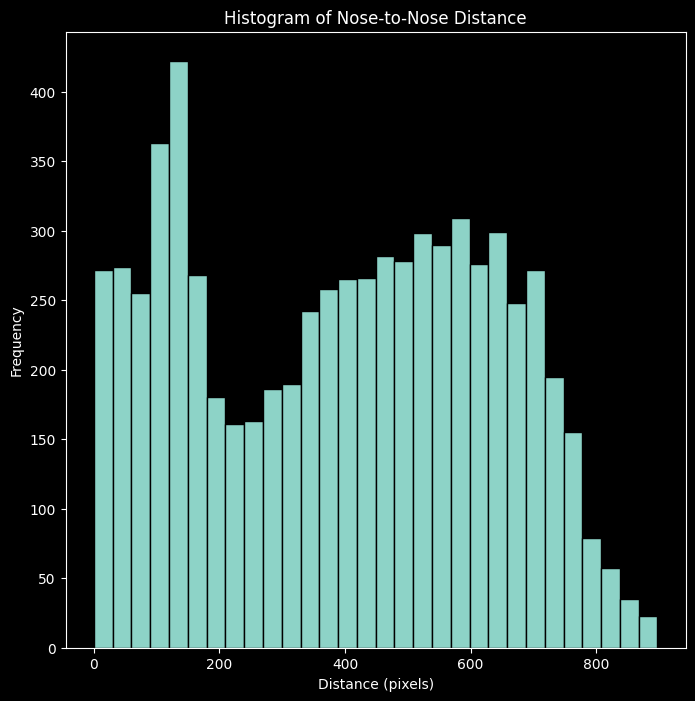

In [19]:
query = "plot a histogram of the nose-to-nose distance of both mice along time. Filter out the nose-to-nose distance bigger than 930"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

In [27]:
query = "What is the mean pixel distance from the nose to the leaft ear of the animal_0? Filter out distances bigger than 930 pixels"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.3025 $
current input tokens 3451
current accumulated tokens 92200
doing active forgetting


To calculate the mean pixel distance from the nose to the left ear of `animal_0` while filtering out distances greater than 930 pixels, we can follow these steps:

1. Retrieve the keypoints data.
2. Identify the indices of the "Nose" and "Left_ear" keypoints.
3. Calculate the Euclidean distance between these keypoints for each frame.
4. Filter out distances greater than 930 pixels.
5. Calculate the mean of the filtered distances.

Here's the code to achieve this:

```python
def get_mean_nose_to_left_ear_distance(identifier):
    """
    Calculate the mean pixel distance from the nose to the left ear of animal_0, filtering out distances greater than 930 pixels.

    Parameters:
    ----------
    identifier: Identifier. Contains information about the video, keypoint, and config.

    Returns:
    -------
    float: The mean distance from the nose to the left ear of animal_0, filtered to be less than or equal to 930 pixels.
    """
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(identifier)
    
    # Get the keypoints data
    keypoints = analysis.get_keypoints()  # shape (n_frames, n_individuals, n_kpts, n_dims)
    
    # Get the keypoint names to find the indices of "Nose" and "Left_ear"
    keypoint_names = analysis.get_keypoint_names()
    nose_index = keypoint_names.index("Nose")
    left_ear_index = keypoint_names.index("Left_ear")
    
    # Extract the coordinates of the "Nose" and "Left_ear" for animal_0
    nose_coords = keypoints[:, 0, nose_index, :]  # shape (n_frames, n_dims)
    left_ear_coords = keypoints[:, 0, left_ear_index, :]  # shape (n_frames, n_dims)
    
    # Calculate the Euclidean distance between the "Nose" and "Left_ear" for each frame
    distances = np.linalg.norm(nose_coords - left_ear_coords, axis=1)  # shape (n_frames,)
    
    # Filter out distances greater than 930 pixels
    filtered_distances = distances[distances <= 930]
    
    # Calculate the mean of the filtered distances
    mean_distance = np.mean(filtered_distances)
    
    return mean_distance
```

### Explanation:
1. **Create an instance of `AnimalBehaviorAnalysis`**: This is done using the `create_analysis` function with the provided `identifier`.
2. **Retrieve keypoints data**: The keypoints data is retrieved using the `get_keypoints` method. The shape of the keypoints data is `(n_frames, n_individuals, n_kpts, n_dims)`.
3. **Identify the indices of "Nose" and "Left_ear"**: The indices of the "Nose" and "Left_ear" keypoints are found using the `get_keypoint_names` method.
4. **Extract the coordinates of the "Nose" and "Left_ear" for `animal_0`**: The coordinates of the "Nose" and "Left_ear" keypoints for `animal_0` are extracted.
5. **Calculate the Euclidean distance**: The Euclidean distance between the "Nose" and "Left_ear" keypoints is calculated for each frame.
6. **Filter out distances greater than 930 pixels**: Distances greater than 930 pixels are filtered out.
7. **Calculate the mean of the filtered distances**: The mean of the filtered distances is calculated.

This function will return the mean distance from the nose to the left ear of `animal_0`, filtered to be less than or equal to 930 pixels.

38.18698

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


doing active forgetting


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.2221 $
current input tokens 3760
current accumulated tokens 32051


Understood. We will calculate the nose-to-tail_base distance (less than 38 pixels) between `animal_0` and `animal_1` and vice versa, and then create a bar plot without inverting the y-axis.

Here is the code:

```python
def plot_nose_to_tail_base_distance(identifier):
    '''
    Calculates the nose-to-tail_base distance (less than 38 pixels) of animal_0 to animal_1 and animal_1 to animal_0 and creates a bar plot.
    
    Parameters:
    ----------
    identifier: Identifier. Contains information about the video, keypoint and config
    '''
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(identifier)
    
    # Get keypoints data
    keypoints = analysis.get_keypoints()  # shape (n_frames, n_individuals, n_kpts, n_dims)
    
    # Get the index of the 'Nose' and 'Tail_base' keypoints
    keypoint_names = analysis.get_keypoint_names()
    nose_index = keypoint_names.index('Nose')
    tail_base_index = keypoint_names.index('Tail_base')
    
    # Extract the coordinates of the 'Nose' and 'Tail_base' keypoints for both animals
    nose_animal_0 = keypoints[:, 0, nose_index, :]  # shape (n_frames, n_dims)
    tail_base_animal_1 = keypoints[:, 1, tail_base_index, :]  # shape (n_frames, n_dims)
    nose_animal_1 = keypoints[:, 1, nose_index, :]  # shape (n_frames, n_dims)
    tail_base_animal_0 = keypoints[:, 0, tail_base_index, :]  # shape (n_frames, n_dims)
    
    # Calculate the Euclidean distance between the 'Nose' of one animal and the 'Tail_base' of the other animal
    distance_animal_0_to_animal_1 = np.linalg.norm(nose_animal_0 - tail_base_animal_1, axis=1)  # shape (n_frames,)
    distance_animal_1_to_animal_0 = np.linalg.norm(nose_animal_1 - tail_base_animal_0, axis=1)  # shape (n_frames,)
    
    # Filter the distances that are less than 38 pixels
    count_animal_0_to_animal_1 = np.sum(distance_animal_0_to_animal_1 < 38)
    count_animal_1_to_animal_0 = np.sum(distance_animal_1_to_animal_0 < 38)
    
    # Create a bar plot to visualize these counts
    fig, ax = plt.subplots()
    ax.bar(['Animal_0 to Animal_1', 'Animal_1 to Animal_0'], [count_animal_0_to_animal_1, count_animal_1_to_animal_0], color=['blue', 'green'])
    
    ax.set_title('Nose-to-Tail_base Distance (< 38 pixels)')
    ax.set_ylabel('Count')
    
    # Set limits for x and y axis to cover the whole image
    ax.set_ylim(0, max(count_animal_0_to_animal_1, count_animal_1_to_animal_0) + 1)
    
    return fig, ax
```

### Explanation:
1. **Retrieve Keypoints Data**: We use `analysis.get_keypoints()` to get the keypoints data, which has the shape `(n_frames, n_individuals, n_kpts, n_dims)`.
2. **Extract Keypoints**: We find the indices of the 'Nose' and 'Tail_base' keypoints and extract their coordinates for both animals.
3. **Calculate Euclidean Distance**: We calculate the Euclidean distance between the 'Nose' of one animal and the 'Tail_base' of the other animal using `np.linalg.norm`.
4. **Filter Distances**: We count the occurrences where the distance is less than 38 pixels.
5. **Create Bar Plot**: We create a bar plot to visualize the counts of these distances for both directions without inverting the y-axis.

This function will return the figure and axis objects for further manipulation or display.

(<Figure size 800x800 with 1 Axes>, <Axes: title={'center': 'Nose-to-Tail_base Distance (< 38 pixels)'}, ylabel='Count'>)

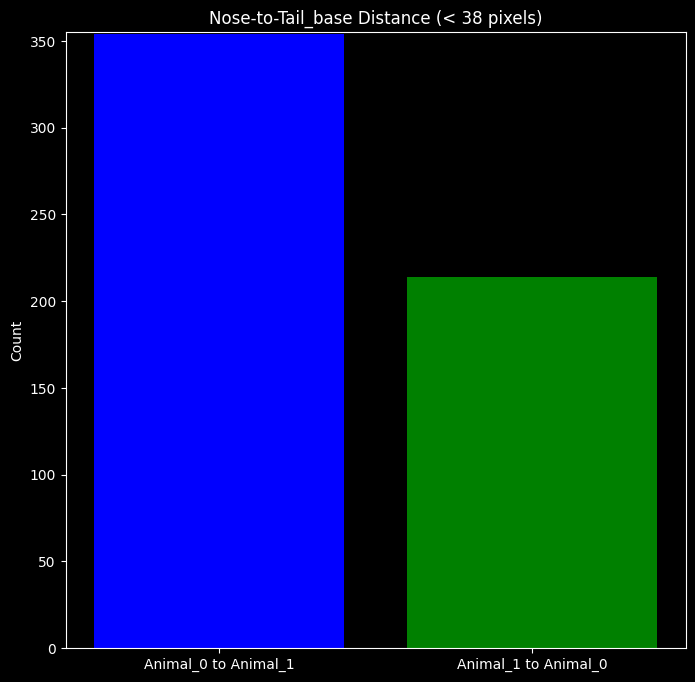

In [10]:
query = "calculate the nose-to-tail_base distance (less than 38 pixels) of ids animal_0 to animal_1 and animal_1 to animal_0. Do a barplot, please not upsidedown"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)